# Exploración de datos de sesiones web

Los datos sobre las sesiones se encuentran en una base de datos de mysql, en la tabla sessions generada por el código del repositorio userEmpathetic. Esta tabla tiene la siguiente estructura (Ignorando los campos redundantes para nuestro análisis).

In [69]:
import MySQLdb as mdb
import pandas as pd

con = mdb.connect("127.0.0.1", "guidecapture", "guidecapture", "guide_informe_final_corfo")
with con:
    cur = con.cursor()
    cur.execute("SELECT id, sequence, user_id, inittime, endtime FROM sessions;")
    rows = cur.fetchall()
    df = pd.DataFrame([[attribute for attribute in session] for session in rows])
    df.rename(columns={0:"id", 1:"sesión", 2:"usuario", 3:"inittime", 4:"endtime"}, inplace=True)

df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: context interface will be changed.  Use explicit conn.commit() or conn.rollback().
  """


,id,sesión,usuario,inittime,endtime
0,1,1 19,1,2016-05-12 10:12:04,2016-05-12 10:13:27
1,2,19,1,2016-05-12 10:15:17,2016-05-12 10:16:27
2,3,19 1 1 19 19,1,2016-05-12 10:18:28,2016-05-12 10:21:28
3,4,1,1,2016-05-12 11:03:31,2016-05-12 11:03:38
4,5,1 14 14 1 1 32 32,1,2016-05-12 11:07:12,2016-05-12 11:11:36


El atributo sesión, está compuesto por una serie de índices, que indica por cuales páginas se pasó, y en cual orden.

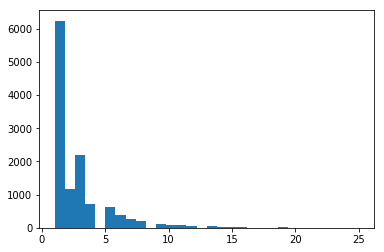

In [70]:
import matplotlib.pyplot as plt
import numpy as np

session_visits = np.asarray([len(s.split(" ")) for s in df['sesión']])

plt.hist(session_visits, bins=30, range=(1,25))
plt.show()

Es claro de los datos que la mayoría de las sesiones se encuentran entre 1 y 20 páginas distintas. Pero también hay una cantidad importante de datos pasadas las 20 visitas por sesión. Por lo que no sería mala idea considerar el logaritmo de las visitas por sesión como una medida importante.

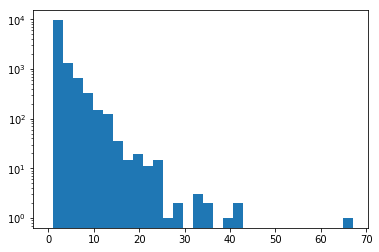

In [71]:
plt.hist(session_visits, bins=30)
plt.semilogy(2)
plt.show()

Los otros atributos importantes, son inittime y endtime, los cuales obviamente ilustran cuando se comienza una sesión, y cuando se termina. Podemos similarmente ver la distribución de estos tiempos para todas las distintas sesiones.

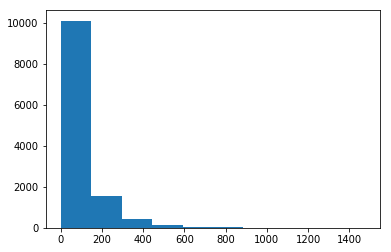

In [85]:
session_lengths = [(end - start).total_seconds() for start, end in zip(df['inittime'], df['endtime'])]

plt.hist(session_lengths)
plt.show()

Nuevamente vemos una distribución similar a una exponencial, por lo que aplicamos logaritmo al eje y para tener una mejor visualización de los datos.

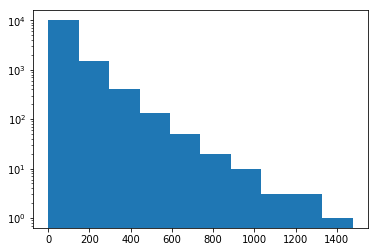

In [86]:
plt.hist(session_lengths)
plt.semilogy(2)
plt.show()

Ahora se logra observar un comportamiento casi lineal del tiempo con respecto a la frecuencia con la que se dan, lo que comprueba nuestra intuición de que el comportamiento inicial era exponencial.